In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

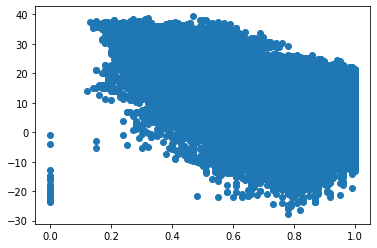

In [74]:
data = pd.read_csv('weatherHistory.csv')
x = data["Humidity"][:96453]
y = data["Apparent Temperature (C)"][:96453]
plt.plot(x, y, 'o')
plt.show()

In [75]:
f1 = open('xdata.txt', 'w')
for xi in x:  
    f1.write(str(xi) + "\n")
f1.close()

f2 = open('ydata.txt', 'w')
for yi in y:
    f2.write(str(yi) + "\n")
f2.close()

In [73]:
alpha = 0.1
ep = 0.01

def gradient_descent(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = 0
    t1 = 0

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            print('Converged, iterations: ', iter, '!!!')
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1

# call gradient decent, and get intercept(=theta0) and slope(=theta1)
theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=10000)
print('theta0 = ' + str(theta0) + ' theta1 = ' + str(theta1))

# plot
for i in range(x.shape[0]):
    y_predict = theta0 + theta1*x 

plt.plot(x, y, 'o')
plt.plot(x, y_predict, 'k-')
plt.show()

KeyboardInterrupt: 